## Projeto - Diabetes

##   - Projeto com finalidade de predizer as chances de obter diabetes


###    1- Business Problem
###    2- Preparação de dados
###    3- Seleção do algoritmo
###    4- Treinamento do modelo
###    5- Teste e avaliação do modelo
    

#### Problema de negócio: Prever a ocorrência de Diabetes


#### Objetivo: Criar um modelo que tenha no mínimo 70% de acurácia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Carregando o dataset
df = pd.read_csv('pima-data.csv')

In [3]:
df = pd.DataFrame(df)

In [4]:
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [5]:
#verificando shape 
df.shape

(768, 10)

In [6]:
#primeiras linhas
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [7]:
#ultimas linhas
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [8]:
#verificando a existência de valores nulos
df.isnull().values.any()

False

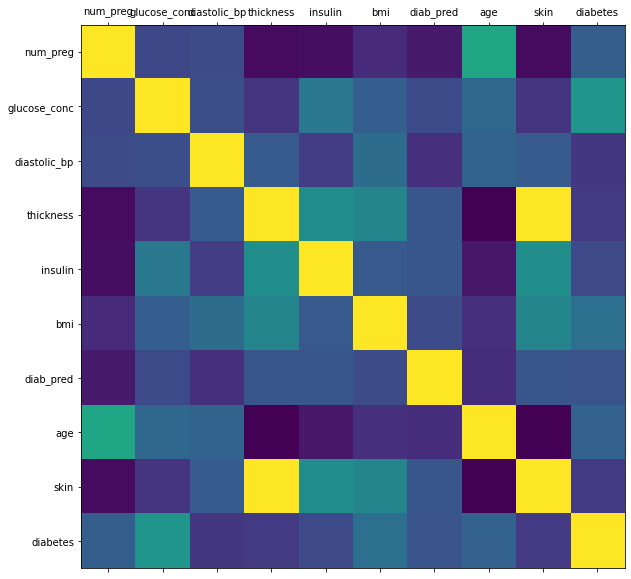

In [9]:
#Identificando Correlação entre as variáveis
#obs: correlação não implica em causalidade
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


A variável target está com valores em string, então vamos passar para os valores numéricos fazendo um mapeamento, 
utilizando a função map e um dicionário para colocar os valores


In [11]:
#Definindo as classes
diabetes_map = {True : 1, False: 0}

#Aplicando o mapeamento no dataset

df['diabetes'] = df['diabetes'].map(diabetes_map)

In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [13]:
#Verificando com os dados estão distrituidos
#Total de numero de casos 
'''Somatória do total de casos e uma projeção em percentual em relação ao valor total'''
num_true = len(df.loc[df['diabetes']== True])
num_false = len(df.loc[df['diabetes']== False])
num_total = num_true + num_false


In [14]:
print('Número de casos verdadeiros {0} ({1:2.2f}%)'.format(num_true, (num_true/num_total)*100))

Número de casos verdadeiros 268 (34.90%)


In [15]:
print('Número de casos falsos {0} ({1:2.2f}%)'.format(num_false, (num_false/num_total)*100))

Número de casos falsos 500 (65.10%)


In [16]:
#Outra forma de contar o somatório
a =len(df[df['diabetes'] == 1].value_counts())
print(f'Número de casos positivos: {a}')
b =len(df[df['diabetes'] == 0].value_counts())
print(f'Número de casos negativos: {b}')
print(f'Número total: {num_total}')

Número de casos positivos: 268
Número de casos negativos: 500
Número total: 768


### Como podemos observar o número de casos negativos é bem maior do que o de positivos
### o que acaba desbalancenando um possível modelo preditivo.
### O ideal é que seja feita uma normalização e balanceamento dos dados

Hora de fazer a separação dos dados, entre dados de teste e dados de treino, onde para que seja melhor aproveitado, Esses dados devem estar balanceados e serem separados de forma aleatória.
Após a separação, iremos usar os dados de treino para treinar o algoritmo, e depois fazer a validação do modelo com os dados de teste, ok?

In [17]:
#Fazer o import de um dos algoritmos que faz a separação
from sklearn.model_selection import train_test_split

In [18]:
#Selecionando as variaveis preditoras 
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
#8 de 10 variaveis selecionadas

In [19]:
atrib_prev = ['diabetes']


In [20]:
x = df[atributos].values
y = df[atrib_prev].values

In [21]:
#Definindo a taxa de split
split_test_size = 0.30

In [22]:
#Criando os dados de modelo e os dados de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = split_test_size, random_state = 42)

In [23]:
#Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index)) * 100))
print('{0:0.2f}% nos dados de teste'.format((len(x_teste)/len(df.index))*100))

69.92% nos dados de treino
30.08% nos dados de teste


In [24]:
x_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [25]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_treino[y_treino[:] == 1]), 
                                               (len(y_treino[y_treino[:] == 1])/len(y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(y_treino[y_treino[:] == 0]), 
                                               (len(y_treino[y_treino[:] == 0])/len(y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_teste[y_teste[:] == 1]), 
                                               (len(y_teste[y_teste[:] == 1])/len(y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(y_teste[y_teste[:] == 0]), 
                                               (len(y_teste[y_teste[:] == 0])/len(y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


## Valores Missing Ocultos

In [26]:
df.isnull().values.any() #False para valores missing, porém existe varios e vamos achar

False

In [27]:
len(df)

768

In [28]:
'''Linhas Missing das variaveis preditoras'''

print('Valores Missing: Glucose_conc: {0}'.format(len(df.loc[df['glucose_conc']==0])))
print('Valores Missing: diastolic_bp: {0}'.format(len(df.loc[df['diastolic_bp']==0])))
print('Valores Missig: thickness: {0}'.format(len(df.loc[df['thickness']==0])))
print('Valores Missing: insulin: {0}'.format(len(df.loc[df['insulin']==0])))
print('Valores Missing BMI: {0}'.format(len(df.loc[df['bmi']==0])))
print('Valores Missing age: {0}'.format(len(df.loc[df['age']==0])))
print('Valores Missing diab_pred {0}'.format(len(df.loc[df['diab_pred']==0])))

Valores Missing: Glucose_conc: 5
Valores Missing: diastolic_bp: 35
Valores Missig: thickness: 227
Valores Missing: insulin: 374
Valores Missing BMI: 11
Valores Missing age: 0
Valores Missing diab_pred 0


## Tratamento dos dados missing - Imputer

####      substituindo os valores iguais a 0, pela média dos dados


In [29]:
#Fazer o import da biblioteca
from sklearn.impute import SimpleImputer

In [30]:
#criando o objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = 'mean')

#Substituindo 
x_treino = preenche_0.fit_transform(x_treino)
x_teste = preenche_0.fit_transform(x_teste)

'''Esse fit_transform só acontece no dataset de treino e teste. O dataset original não é alterado'''

'Esse fit_transform só acontece no dataset de treino e teste. O dataset original não é alterado'

In [31]:
x_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

### Construindo e treinando o modelo


In [32]:
#Fazer o import da Função
from sklearn.naive_bayes import GaussianNB

In [33]:
# Instanciando a função GaussianNB no objeto
modelo_v1 = GaussianNB()

In [35]:
#Treinando o modelo
modelo_v1.fit(x_treino, y_treino.ravel()) #.ravel ajusta o shape

GaussianNB()

### Verificando a acuracia do dataset de treino

In [54]:
from sklearn import metrics

In [71]:

nb_predict_train = modelo_v1.predict(x_treino)
print('Acuracia do dataset de treino: {:.4f} '.format(metrics.accuracy_score(y_treino,nb_predict_train)))

nb_predict_test = modelo_v1.predict(x_teste)
print('Acuracia do dataset de teste: {:.4f} '.format(metrics.accuracy_score(y_teste,nb_predict_test)))


Acuracia do dataset de treino: 0.7542 
Acuracia do dataset de teste: 0.7359 


### Agora iremos criar um relátorio de classificação, e também uma matriz de confusão para avaliar o modelo

In [70]:
#Matriz Confusão
print(metrics.confusion_matrix(y_teste, nb_predict_test, labels =[1,0]))

#Classification Report
print(metrics.classification_report(y_teste, nb_predict_test, labels=[1,0]))

[[ 52  28]
 [ 33 118]]
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Utilizando o Random Forest

In [95]:
#import do pacote 
from sklearn.ensemble import RandomForestClassifier

#instanciando o objeto
modelo_v2 = RandomForestClassifier(random_state = 42)

#Fazendo o fit do modelo
modelo_v2.fit(x_treino, y_treino.ravel())

##################################################################

#Verificando os dados de treino (acurácia)

rf_predict_train = modelo_v2.predict(x_treino) 
print(metrics.accuracy_score(y_treino, rf_predict_train))

#Verificando os dados de teste (acurácia)
rf_predict_test = modelo_v2.predict(x_teste)
print(metrics.accuracy_score(y_teste, rf_predict_test))

#######################################################

#Relátorio de Classificação 
#Matriz confusão
print(metrics.confusion_matrix(y_teste, rf_predict_test, labels=[1,0]))

#Classification report
print(metrics.classification_report(y_teste, rf_predict_test, labels=[1,0]))

1.0
0.7402597402597403
[[ 52  28]
 [ 32 119]]
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Utilizando Regressão Logistica

In [104]:
#import 
from sklearn.linear_model import LogisticRegression

#instanciar o modelo
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)

#fazendo o fit(treinamento do modelo)
modelo_v3.fit(x_treino,y_treino.ravel())

#Verificando os dados de teste(acurácia)
lr_predict_test = modelo_v3.predict(x_teste)
print(metrics.accuracy_score(y_teste, lr_predict_test))

#Matriz Confusão
print(metrics.confusion_matrix(y_teste, lr_predict_test, labels=[1,0]))

#Relatório de classificação
print(metrics.classification_report(y_teste, lr_predict_test, labels=[1,0]))

0.7359307359307359
[[ 47  33]
 [ 28 123]]
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



## Salvando o modelo para usar depois

In [106]:
import pickle

filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [113]:
#carregando o modelo
loaded_model = pickle.load(open(filename, 'rb'))

#Fazendo Previsões
resultado1 = loaded_model.predict(x_teste[15].reshape(1,-1))
resultado1
if resultado1 == [1]:
    print('Negativo')
else: 
    print('Positivo')

Positivo


In [125]:
st = input(str('O que Deseja converter em binário: '))

' '.join(format(ord(x), 'b') for x in st)

O que Deseja converter em binário:  m


'1101101'

In [128]:
dec = int(input('Digite o numero'))
print(dec)
bin(dec)[2:]

Difite o numero 1995


1995


'11111001011'